In [8]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
df="/content/training.csv"
data=pd.read_csv(df).dropna(axis=1)
disease_counts=data["prognosis"].value_counts()
# print(disease_counts)
temp_df=pd.DataFrame({"Disease":disease_counts.index,"Counts":disease_counts.values})
temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


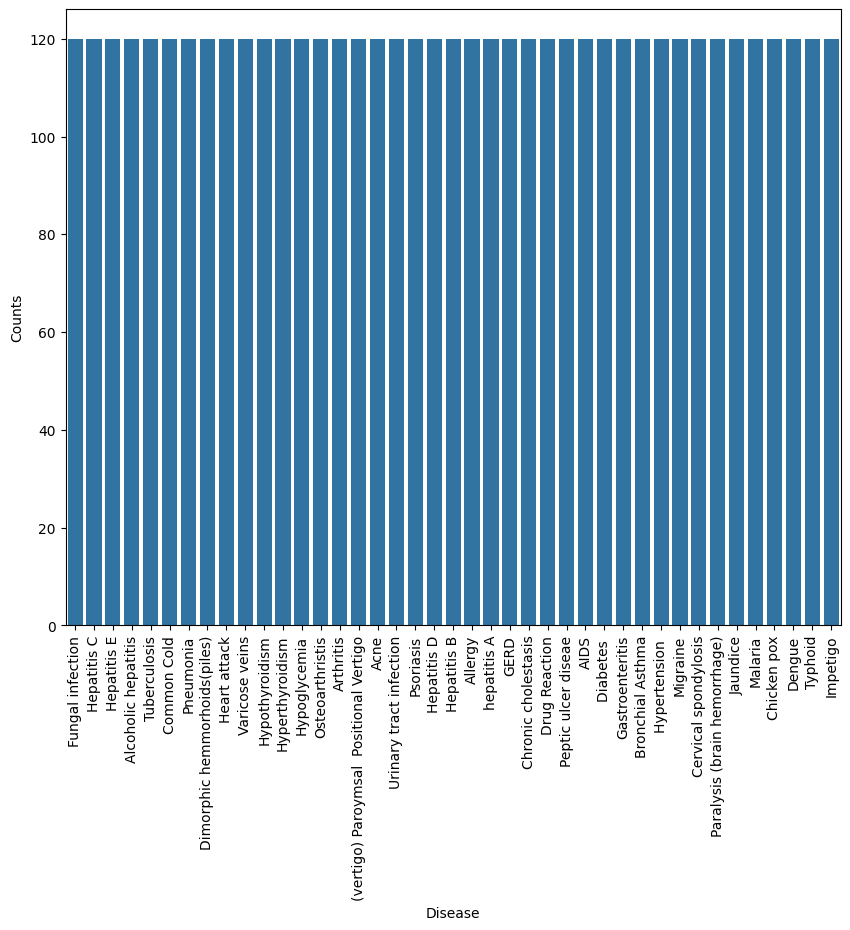

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='Disease',y='Counts',data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [3]:
encoder=LabelEncoder()  #it is used to transform categorical labels into numerical labels.
data['prognosis']=encoder.fit_transform(data["prognosis"])

In [20]:
x=data.iloc[:,:-1]
print(x)
y=data.iloc[:,-1]
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)
print(f"Train:{x_train.shape},{y_train.shape}")
print(f"Test:{x_test.shape},{y_test.shape}")

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

Random Forest Classifier

Accuracy on train data by Random Forest Classifier:100.0
Accuracy on test data by Random Forest Classifier:100.0


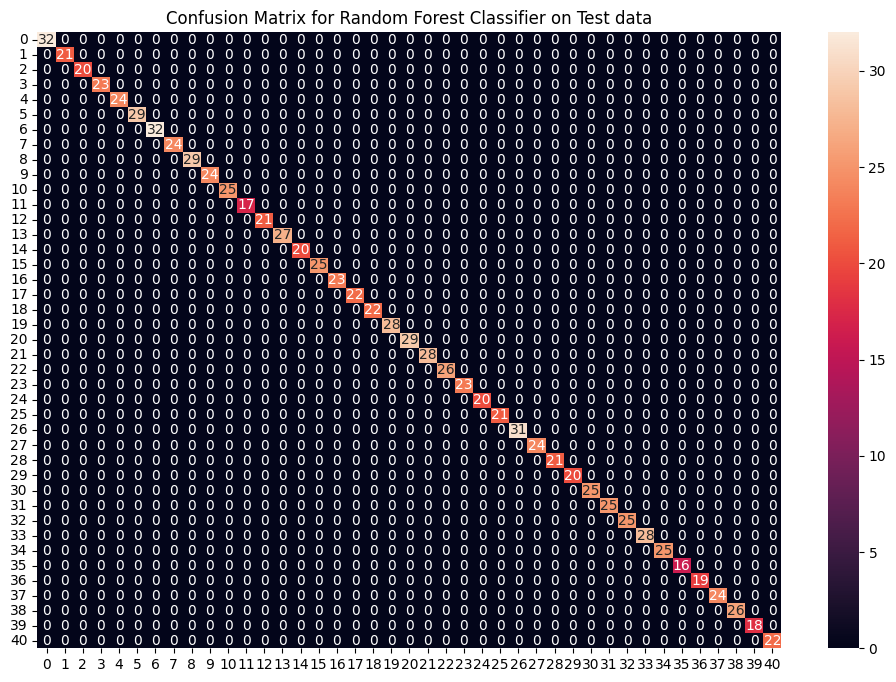

In [22]:
rf_model=RandomForestClassifier(random_state=10)
rf_model.fit(x_train,y_train)
predic=rf_model.predict(x_test)
print(f"Accuracy on train data by Random Forest Classifier:{accuracy_score(y_train,rf_model.predict(x_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier:{accuracy_score(y_test,predic)*100}")
cf_matrix = confusion_matrix(y_test,predic)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test data")
plt.show()

In [6]:
final_rf_model=RandomForestClassifier(random_state=18)
final_rf_model.fit(x,y)

RandomForestClassifier(random_state=18)

Accuracy on Test dataset by the combined model: 1.0


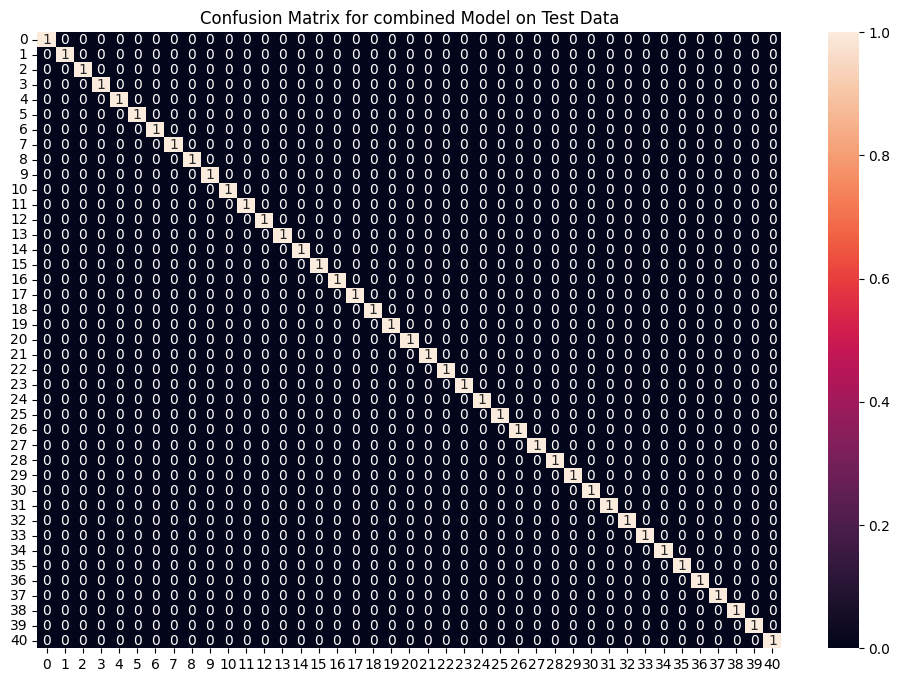

In [23]:
test_data=pd.read_csv("/content/testing.csv").dropna(axis=1)
test_x=test_data.iloc[:,:-1]
test_y=encoder.transform(test_data.iloc[:,-1])
rf_preds=final_rf_model.predict(test_x)
final_preds=[mode([i])[0][0] for i in zip(rf_preds)]
final_preds
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_y,rf_preds)}")
cf_matrix=confusion_matrix(test_y,final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for combined Model on Test Data")
plt.show()

In [10]:
def cv_scoring(estimator,x,y):
  return accuracy_score(y,estimator.predict(x))
model={'Random Forest':RandomForestClassifier(random_state=10)}
for model_name in model:
  models=model[model_name]
  scores=cross_val_score(models,x,y,cv=10,n_jobs=-1,scoring=cv_scoring)
  print("=="*30)
  print(model_name)
  print(f"Scores: {scores}")
  print(f"Mean Score: {np.mean(scores)}")

Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [11]:
symptoms=x.columns.values

symptom_index={}
for index,value in enumerate(symptoms):
  symptom=" ".join([i.capitalize() for i in value.split("_")])
  symptom_index[symptom]=index
  data_dict= {"symptom_index":symptom_index,"prediction_classes":encoder.classes_}
  def predictDisease(symptoms):
    symptoms=symptoms.split(",")

    input_data=[0]* len(data_dict["symptom_index"])
    for symptom in symptoms:
      index=data_dict["symptom_index"][symptom]
      input_data[index]=1
    input_data=np.array(input_data).reshape(1,-1)
    rf_prediction=data_dict["prediction_classes"][final_rf_model.predict(input_data)[0]]
    final_prediction=np.unique([rf_prediction])[0][0]
    predictions={"rf_model_prediction":rf_prediction,"final_prediction":final_prediction}
    return predictions
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'final_prediction': 'F'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
